In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Lo primero, leemos el dataframe
pd.options.display.max_columns
df = pd.read_csv('df_all_rs.csv')
df

,Unnamed: 0,index,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,0,0,2004-04-14,20301188,1610612746,1610612760,2003,1610612746,87.0,0.423,...,17.0,37.0,1610612760,118.0,0.542,1.000,0.375,32.0,34.0,0
1,1,1,2004-04-14,20301184,1610612759,1610612743,2003,1610612759,93.0,0.424,...,15.0,58.0,1610612743,67.0,0.325,0.611,0.222,11.0,47.0,1
2,2,2,2004-04-14,20301181,1610612754,1610612741,2003,1610612754,101.0,0.420,...,24.0,58.0,1610612741,96.0,0.420,0.667,0.357,20.0,41.0,1
3,3,3,2004-04-14,20301177,1610612764,1610612740,2003,1610612764,78.0,0.375,...,13.0,39.0,1610612740,94.0,0.451,0.600,0.364,24.0,48.0,0
4,4,4,2004-04-14,20301179,1610612752,1610612739,2003,1610612752,90.0,0.481,...,13.0,42.0,1610612739,100.0,0.488,0.900,0.364,22.0,40.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19393,19393,19393,2018-10-17,21800011,1610612758,1610612762,2018,1610612758,117.0,0.516,...,17.0,37.0,1610612762,123.0,0.519,0.737,0.481,21.0,44.0,0
19394,19394,19394,2018-10-17,21800012,1610612746,1610612743,2018,1610612746,98.0,0.398,...,21.0,47.0,1610612743,107.0,0.379,0.786,0.333,20.0,56.0,0
19395,19395,19395,2018-10-17,21800013,1610612756,1610612742,2018,1610612756,121.0,0.543,...,35.0,44.0,1610612742,100.0,0.432,0.700,0.303,28.0,38.0,1
19396,19396,19396,2018-10-16,21800001,1610612738,1610612755,2018,1610612738,105.0,0.433,...,21.0,55.0,1610612755,87.0,0.391,0.609,0.192,18.0,47.0,1


In [4]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('index', axis=1)

<AxesSubplot:>

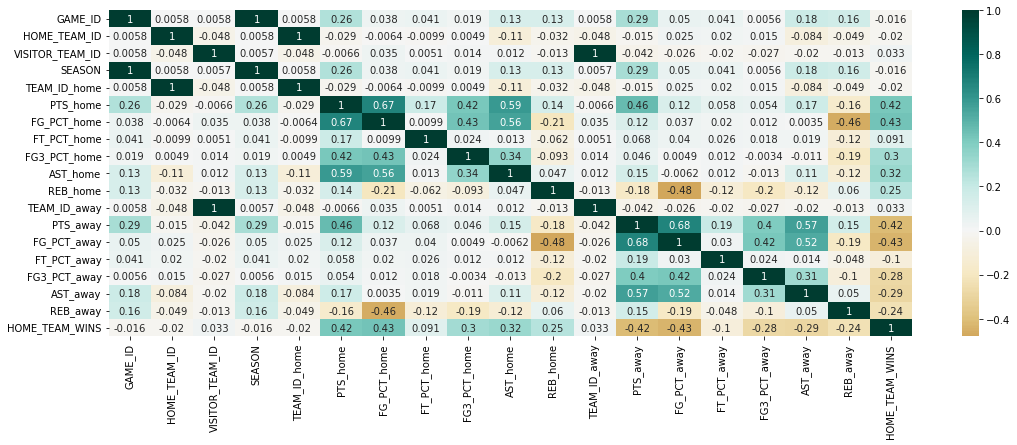

In [5]:
df_corr = df.corr()
plt.figure(figsize=(18,6))
sns.heatmap(df_corr, annot=True, cmap='BrBG', center=0)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve

In [7]:
target = df['HOME_TEAM_WINS']
data = df[['FG_PCT_home', 'FG_PCT_away', 'FG3_PCT_home', 'FG3_PCT_away']]

In [8]:
data.shape
target.shape

(19398,)

acc: 0.802     recall: 0.861     precision:0.818     f1:0.839     auc:0.883


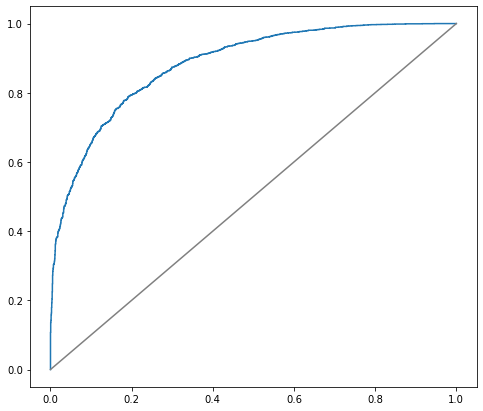

In [10]:
def evaluate(estimator, data, target):

    X_train, X_test, y_train, y_test = train_test_split(data,target)

    estimator.fit(X_train, y_train)
    y_hat = estimator.predict(X_test)
    probs = estimator.predict_proba(X_test)[:,1]

    # plotear curva roc
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    f, ax = plt.subplots(1,1)
    f.set_size_inches(8,7)
    ax.plot(fpr,tpr)
    ax.plot([0,1], [0,1], c='grey')

    print(f'acc: {accuracy_score(y_test, y_hat):.3} \
    recall: {recall_score(y_test, y_hat):.3} \
    precision:{precision_score(y_test, y_hat):.3} \
    f1:{f1_score(y_test, y_hat):.3} \
    auc:{roc_auc_score(y_test, probs):.3}')

logR = LogisticRegression()
evaluate(logR, data, target)

In [9]:
metrics_results = pd.DataFrame(columns=['MSE','RMSE', "MAE"])

def evaluar_metricas(estimator, data, target, name):
    
    X_train, X_test, y_train, y_test = train_test_split(data,target)

    estimator.fit(X_train, y_train)
    y_hat = estimator.predict(X_test)

    errors = y_test - y_hat
    mae = np.mean(np.abs(errors))
    mse = np.mean(errors ** 2)
    rmse = np.sqrt(mse)
    
    metrics_results.loc[name] = [mse,rmse,mae]

In [10]:
lr = LinearRegression()
kn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
mlpr = MLPRegressor()
logR = LogisticRegression()

evaluar_metricas(lr, data, target, 'lr')
evaluar_metricas(kn, data, target, 'kn')
evaluar_metricas(dt, data, target, 'dt')
evaluar_metricas(rf, data, target, 'rf')
evaluar_metricas(mlpr, data, target, 'mlpr')
evaluar_metricas(logR, data, target, 'logR')

metrics_results.style.highlight_min(color='lightgreen', axis=0)

,MSE,RMSE,MAE
lr,0.142175,0.377061,0.320730
kn,0.162920,0.403633,0.271505
dt,0.274021,0.523470,0.274021
rf,0.143905,0.379348,0.271140
mlpr,0.135796,0.368505,0.280220
logR,0.197938,0.444902,0.197938


In [11]:
# A priori parace que los algoritmos que menos error dan son mlpr y logR
# Esto es una primera prueba, no tenemos los datos normalizados si quiera
# Asi que lo primero que vamos a hacer es normalizar

In [12]:
data_copy = data.copy()
normalized_data = (data_copy - data_copy.mean()) / data_copy.std()

In [13]:
# Volvemos a evaluar, pero ahora con los datos normalizados
evaluar_metricas(lr, normalized_data, target, 'lr_normalized')
evaluar_metricas(kn, normalized_data, target, 'kn_normalized')
evaluar_metricas(dt, normalized_data, target, 'dt_normalized')
evaluar_metricas(rf, normalized_data, target, 'rf_normalized')
evaluar_metricas(mlpr, normalized_data, target, 'mlpr_normalized')
evaluar_metricas(logR, normalized_data, target, 'logR_normalized')

metrics_results.style.highlight_min(color='lightgreen', axis=0)

,MSE,RMSE,MAE
lr,0.142175,0.377061,0.320730
kn,0.162920,0.403633,0.271505
dt,0.274021,0.523470,0.274021
rf,0.143905,0.379348,0.271140
mlpr,0.135796,0.368505,0.280220
logR,0.197938,0.444902,0.197938
lr_normalized,0.140578,0.374938,0.317663
kn_normalized,0.153377,0.391634,0.260247
dt_normalized,0.260206,0.510104,0.260206
rf_normalized,0.138518,0.372180,0.266400


In [25]:
alg_metrics = pd.DataFrame(columns=['MSE','RMSE', "MAE"])

def evaluar_alg_metrics(estimator, data, target, name):
    
    X_train, X_test, y_train, y_test = train_test_split(data,target)

    estimator.fit(X_train, y_train)
    y_hat = estimator.predict(X_test)

    errors = y_test - y_hat
    mae = np.mean(np.abs(errors))
    mse = np.mean(errors ** 2)
    rmse = np.sqrt(mse)
    
    alg_metrics.loc[name] = [mse,rmse,mae]


for i in range(1,51):
    evaluar_alg_metrics(lr, normalized_data, target, 'lr_normalized_'+str(i))
    evaluar_alg_metrics(kn, normalized_data, target, 'kn_normalized_'+str(i))
    evaluar_alg_metrics(dt, normalized_data, target, 'dt_normalized_'+str(i))
    evaluar_alg_metrics(rf, normalized_data, target, 'rf_normalized_'+str(i))
    evaluar_alg_metrics(mlpr, normalized_data, target, 'mlpr_normalized_'+str(i))
    evaluar_alg_metrics(logR, normalized_data, target, 'logR_normalized_'+str(i))


In [26]:
alg_metrics

,MSE,RMSE,MAE
lr_normalized_1,0.141431,0.376073,0.319045
kn_normalized_1,0.130882,0.361776,0.267810
dt_normalized_1,0.268454,0.518125,0.268454
rf_normalized_1,0.141542,0.376220,0.267291
mlpr_normalized_1,0.134306,0.366478,0.265942
...,...,...,...
kn_normalized_50,0.128817,0.358911,0.267086
dt_normalized_50,0.281237,0.530318,0.281237
rf_normalized_50,0.146500,0.382753,0.271462
mlpr_normalized_50,0.134696,0.367009,0.267572


In [44]:
alg_metrics[:6].min(axis=0)

MSE     0.130882
RMSE    0.361776
MAE     0.189691
dtype: float64

In [ ]:
alg_metrics_mins = pd.DataFrame(columns=['MSE','RMSE', "MAE"])

alg_metrics_mins.loc[]

In [ ]:
alg_metrics.to_csv('alg_metrics.csv')

In [23]:
# Con los datos normalizados vemos que el algoritmo mlpr sigue siendo el que menos error tiene
# Antes de decidirnos del todo por un algoritmo, vamos a a "toquetear" un poco cada uno,
# jugar con sus parametros y demas

In [ ]:
# Vamos a empezar con Kneighbors
# Para ello modificamos un poco la funcion que teniamos antes para evaluar, para que nos guarde los resultados
# en un dataframe distinto, uno solo para kn

# kn

In [16]:
kn_metrics = pd.DataFrame(columns=['MSE','RMSE', "MAE"])

def evaluar_metricas_kn(estimator, data, target, name):
    
    X_train, X_test, y_train, y_test = train_test_split(data,target)

    estimator.fit(X_train, y_train)
    y_hat = estimator.predict(X_test)

    errors = y_test - y_hat
    mae = np.mean(np.abs(errors))
    mse = np.mean(errors ** 2)
    rmse = np.sqrt(mse)
    
    kn_metrics.loc[name] = [mse,rmse,mae]

for i in range(1, 51):
    kn = KNeighborsRegressor(n_neighbors=i)
    evaluar_metricas_kn(kn, normalized_data, target, 'kn_normalized_'+str(i))
    
kn_metrics.style.highlight_min(color='lightgreen', axis=0)

,MSE,RMSE,MAE
kn_normalized_1,0.254021,0.504005,0.254021
kn_normalized_2,0.199278,0.446406,0.265155
kn_normalized_3,0.171982,0.414707,0.261512
kn_normalized_4,0.162345,0.402921,0.259175
kn_normalized_5,0.155192,0.393944,0.261979
kn_normalized_6,0.150848,0.388391,0.261512
kn_normalized_7,0.147204,0.383672,0.264242
kn_normalized_8,0.146608,0.382894,0.262706
kn_normalized_9,0.146012,0.382116,0.264994
kn_normalized_10,0.138711,0.372440,0.258660


### Conclusión kn:
#### n_neighbors es 38(MSE y RMSE)
#### n_neighbors es 1(MAE)
#### MSE=0.129318 	RMSE=0.359608 	MAE=0.254021

# dt

In [39]:
dt_metrics = pd.DataFrame(columns=['MSE','RMSE', "MAE"])

def evaluar_metricas_dt(estimator, data, target, name):
    
    X_train, X_test, y_train, y_test = train_test_split(data,target)

    estimator.fit(X_train, y_train)
    y_hat = estimator.predict(X_test)

    errors = y_test - y_hat
    mae = np.mean(np.abs(errors))
    mse = np.mean(errors ** 2)
    rmse = np.sqrt(mse)
    
    dt_metrics.loc[name] = [mse,rmse,mae]


for i in range(1, 50):
    for j in range(1,10):
        dt = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        evaluar_metricas_dt(dt, normalized_data, target, 'dt_normalized_'+str(i)+str(j))
        j += 1
    i += 1
    
dt_metrics.style.highlight_min(color='lightgreen', axis=0)

,MSE,RMSE,MAE
dt_normalized_11,0.209433,0.457638,0.417655
dt_normalized_12,0.213337,0.461885,0.418874
dt_normalized_13,0.207405,0.455417,0.415845
dt_normalized_14,0.209679,0.457907,0.417234
dt_normalized_15,0.207917,0.455979,0.415579
dt_normalized_16,0.209558,0.457775,0.417669
dt_normalized_17,0.204707,0.452446,0.413900
dt_normalized_18,0.210154,0.458425,0.417791
dt_normalized_19,0.211749,0.460162,0.418769
dt_normalized_21,0.164845,0.406011,0.336525


### Conclusión dt:
#### max_depth=6 y min_samples_leaf=3(MSE y RMSE)
#### max_depth=25 y min_samples_leaf=4(MAE)
#### MSE=0.140035 	RMSE=0.374212 	MAE=0.245276

# rf

In [ ]:
rf_metrics = pd.DataFrame(columns=['MSE','RMSE', "MAE"])

def evaluar_metricas_rf(estimator, data, target, name):
    
    X_train, X_test, y_train, y_test = train_test_split(data,target)

    estimator.fit(X_train, y_train)
    y_hat = estimator.predict(X_test)

    errors = y_test - y_hat
    mae = np.mean(np.abs(errors))
    mse = np.mean(errors ** 2)
    rmse = np.sqrt(mse)
    
    rf_metrics.loc[name] = [mse,rmse,mae]


#for k in range(1,30):
    for i in range(1, 50):
        for j in range(1,10):
            rf = RandomForestRegressor(n_estimators=k, max_depth=i, min_samples_leaf=j)
            evaluar_metricas_rf(rf, normalized_data, target, 'rf_normalized_'+str(k)+str(i)+str(j))
            j += 1
        i += 1
    k += 1

#rf_metrics.style.highlight_min(color='lightgreen', axis=0)

In [38]:
rf_metrics2 = pd.DataFrame(columns=['MSE','RMSE', "MAE"])

def evaluar_metricas_rf(estimator, data, target, name):
    
    X_train, X_test, y_train, y_test = train_test_split(data,target)

    estimator.fit(X_train, y_train)
    y_hat = estimator.predict(X_test)

    errors = y_test - y_hat
    mae = np.mean(np.abs(errors))
    mse = np.mean(errors ** 2)
    rmse = np.sqrt(mse)
    
    rf_metrics2.loc[name] = [mse,rmse,mae]
    
rf = RandomForestRegressor(n_estimators=16, max_depth=4, min_samples_leaf=17)
evaluar_metricas_rf(rf, normalized_data, target, 'rf_normalized_16_4_17')
rf_metrics2.style.highlight_min(color='lightgreen', axis=0)

,MSE,RMSE,MAE
rf_normalized_16_4_17,0.141625,0.376331,0.293258


### Conclusión rf:
#### minimo cuando: rf_normalized_16417 -> n_estimators=16, max_depth=41, min_samples_leaf=7
#### MSE=0.141625 	RMSE=0.376331 	MAE=0.293258

# logR

In [19]:
logR_metrics = pd.DataFrame(columns=['MSE','RMSE', "MAE"])

def evaluar_metricas_logR(estimator, data, target, name):
    
    X_train, X_test, y_train, y_test = train_test_split(data,target)

    estimator.fit(X_train, y_train)
    y_hat = estimator.predict(X_test)

    errors = y_test - y_hat
    mae = np.mean(np.abs(errors))
    mse = np.mean(errors ** 2)
    rmse = np.sqrt(mse)
    
    logR_metrics.loc[name] = [mse,rmse,mae]

logR = LogisticRegression()
evaluar_metricas_logR(logR, normalized_data, target, 'logR_normalized')


logR_metrics.style.highlight_min(color='lightgreen', axis=0)

,MSE,RMSE,MAE
logR_normalized,0.183505,0.428375,0.183505


### Conclusión logR:
#### minimo cuando:

# mlpr

In [23]:
mlpr_metrics = pd.DataFrame(columns=['MSE','RMSE', "MAE"])

def evaluar_metricas_mlpr(estimator, data, target, name):
    
    X_train, X_test, y_train, y_test = train_test_split(data,target)

    estimator.fit(X_train, y_train)
    y_hat = estimator.predict(X_test)

    errors = y_test - y_hat
    mae = np.mean(np.abs(errors))
    mse = np.mean(errors ** 2)
    rmse = np.sqrt(mse)
    
    mlpr_metrics.loc[name] = [mse,rmse,mae]

mlpr = MLPRegressor(activation='relu', solver='adam', batch_size='auto', learning_rate='constant')
evaluar_metricas_mlpr(mlpr, normalized_data, target, 'mlpr_normalized_relu')


mlpr_metrics.style.highlight_min(color='lightgreen', axis=0)

,MSE,RMSE,MAE
mlpr_normalized_relu,0.129276,0.359549,0.267425


In [24]:
mlpr = MLPRegressor(activation='logistic', solver='adam', batch_size='auto', learning_rate='constant')
evaluar_metricas_mlpr(mlpr, normalized_data, target, 'mlpr_normalized_logistic')


mlpr_metrics.style.highlight_min(color='lightgreen', axis=0)

,MSE,RMSE,MAE
mlpr_normalized_relu,0.129276,0.359549,0.267425
mlpr_normalized_logistic,0.143389,0.378667,0.317506


In [25]:
mlpr = MLPRegressor(activation='tanh', solver='adam', batch_size='auto', learning_rate='constant')
evaluar_metricas_mlpr(mlpr, normalized_data, target, 'mlpr_normalized_tanh')


mlpr_metrics.style.highlight_min(color='lightgreen', axis=0)

,MSE,RMSE,MAE
mlpr_normalized_relu,0.129276,0.359549,0.267425
mlpr_normalized_logistic,0.143389,0.378667,0.317506
mlpr_normalized_tanh,0.128974,0.359129,0.264027


In [26]:
mlpr = MLPRegressor(activation='tanh', solver='sgd', batch_size='auto', learning_rate='constant')
evaluar_metricas_mlpr(mlpr, normalized_data, target, 'mlpr_normalized_tanh_sgd')


mlpr_metrics.style.highlight_min(color='lightgreen', axis=0)

,MSE,RMSE,MAE
mlpr_normalized_relu,0.129276,0.359549,0.267425
mlpr_normalized_logistic,0.143389,0.378667,0.317506
mlpr_normalized_tanh,0.128974,0.359129,0.264027
mlpr_normalized_tanh_sgd,0.136979,0.370106,0.306805


In [27]:
mlpr = MLPRegressor(activation='tanh', solver='adam', batch_size=100, learning_rate='constant')
evaluar_metricas_mlpr(mlpr, normalized_data, target, 'mlpr_normalized_tanh_adam_bs100')


mlpr_metrics.style.highlight_min(color='lightgreen', axis=0)

,MSE,RMSE,MAE
mlpr_normalized_relu,0.129276,0.359549,0.267425
mlpr_normalized_logistic,0.143389,0.378667,0.317506
mlpr_normalized_tanh,0.128974,0.359129,0.264027
mlpr_normalized_tanh_sgd,0.136979,0.370106,0.306805
mlpr_normalized_tanh_adam_bs100,0.135404,0.367973,0.273288


In [28]:
mlpr = MLPRegressor(activation='tanh', solver='adam', batch_size=300, learning_rate='constant')
evaluar_metricas_mlpr(mlpr, normalized_data, target, 'mlpr_normalized_tanh_adam_bs300')


mlpr_metrics.style.highlight_min(color='lightgreen', axis=0)

,MSE,RMSE,MAE
mlpr_normalized_relu,0.129276,0.359549,0.267425
mlpr_normalized_logistic,0.143389,0.378667,0.317506
mlpr_normalized_tanh,0.128974,0.359129,0.264027
mlpr_normalized_tanh_sgd,0.136979,0.370106,0.306805
mlpr_normalized_tanh_adam_bs100,0.135404,0.367973,0.273288
mlpr_normalized_tanh_adam_bs300,0.128915,0.359047,0.268502


In [29]:
mlpr = MLPRegressor(activation='tanh', solver='adam', batch_size='auto', learning_rate='invscaling')
evaluar_metricas_mlpr(mlpr, normalized_data, target, 'mlpr_normalized_tanh_adam_bsauto_invscaling')


mlpr_metrics.style.highlight_min(color='lightgreen', axis=0)

,MSE,RMSE,MAE
mlpr_normalized_relu,0.129276,0.359549,0.267425
mlpr_normalized_logistic,0.143389,0.378667,0.317506
mlpr_normalized_tanh,0.128974,0.359129,0.264027
mlpr_normalized_tanh_sgd,0.136979,0.370106,0.306805
mlpr_normalized_tanh_adam_bs100,0.135404,0.367973,0.273288
mlpr_normalized_tanh_adam_bs300,0.128915,0.359047,0.268502
mlpr_normalized_tanh_adam_bsauto_invscaling,0.131671,0.362865,0.265787


In [30]:
mlpr = MLPRegressor(activation='tanh', solver='adam', batch_size='auto', learning_rate='adaptive')
evaluar_metricas_mlpr(mlpr, normalized_data, target, 'mlpr_normalized_tanh_adam_bsauto_adaptive')


mlpr_metrics.style.highlight_min(color='lightgreen', axis=0)

,MSE,RMSE,MAE
mlpr_normalized_relu,0.129276,0.359549,0.267425
mlpr_normalized_logistic,0.143389,0.378667,0.317506
mlpr_normalized_tanh,0.128974,0.359129,0.264027
mlpr_normalized_tanh_sgd,0.136979,0.370106,0.306805
mlpr_normalized_tanh_adam_bs100,0.135404,0.367973,0.273288
mlpr_normalized_tanh_adam_bs300,0.128915,0.359047,0.268502
mlpr_normalized_tanh_adam_bsauto_invscaling,0.131671,0.362865,0.265787
mlpr_normalized_tanh_adam_bsauto_adaptive,0.132158,0.363535,0.271138


In [37]:
mlpr = MLPRegressor(activation='tanh', solver='adam', batch_size=450, learning_rate='constant')
evaluar_metricas_mlpr(mlpr, normalized_data, target, 'mlpr_normalized_tanh_adam_bs450')


mlpr_metrics.style.highlight_min(color='lightgreen', axis=0)

,MSE,RMSE,MAE
mlpr_normalized_relu,0.129276,0.359549,0.267425
mlpr_normalized_logistic,0.143389,0.378667,0.317506
mlpr_normalized_tanh,0.128974,0.359129,0.264027
mlpr_normalized_tanh_sgd,0.136979,0.370106,0.306805
mlpr_normalized_tanh_adam_bs100,0.135404,0.367973,0.273288
mlpr_normalized_tanh_adam_bs300,0.128915,0.359047,0.268502
mlpr_normalized_tanh_adam_bsauto_invscaling,0.131671,0.362865,0.265787
mlpr_normalized_tanh_adam_bsauto_adaptive,0.132158,0.363535,0.271138
mlpr_normalized_tanh_adam_bs500,0.132892,0.364544,0.281339
mlpr_normalized_tanh_adam_bs1000,0.133662,0.365598,0.279375


In [40]:
mlpr = MLPRegressor(activation='tanh', solver='adam', batch_size=425, learning_rate='constant')
evaluar_metricas_mlpr(mlpr, normalized_data, target, 'mlpr_normalized_tanh_adam_bs425')


mlpr_metrics.style.highlight_min(color='lightgreen', axis=0)

,MSE,RMSE,MAE
mlpr_normalized_relu,0.129276,0.359549,0.267425
mlpr_normalized_logistic,0.143389,0.378667,0.317506
mlpr_normalized_tanh,0.128974,0.359129,0.264027
mlpr_normalized_tanh_sgd,0.136979,0.370106,0.306805
mlpr_normalized_tanh_adam_bs100,0.135404,0.367973,0.273288
mlpr_normalized_tanh_adam_bs300,0.128915,0.359047,0.268502
mlpr_normalized_tanh_adam_bsauto_invscaling,0.131671,0.362865,0.265787
mlpr_normalized_tanh_adam_bsauto_adaptive,0.132158,0.363535,0.271138
mlpr_normalized_tanh_adam_bs500,0.132892,0.364544,0.281339
mlpr_normalized_tanh_adam_bs1000,0.133662,0.365598,0.279375


In [42]:
for i in range(1,30):
    mlpr = MLPRegressor(activation='tanh', solver='adam', batch_size=400+i, learning_rate='constant')
    evaluar_metricas_mlpr(mlpr, normalized_data, target, 'mlpr_normalized_tanh_adam_bs_'+str(i))


mlpr_metrics.style.highlight_min(color='lightgreen', axis=0)

,MSE,RMSE,MAE
mlpr_normalized_relu,0.129276,0.359549,0.267425
mlpr_normalized_logistic,0.143389,0.378667,0.317506
mlpr_normalized_tanh,0.128974,0.359129,0.264027
mlpr_normalized_tanh_sgd,0.136979,0.370106,0.306805
mlpr_normalized_tanh_adam_bs100,0.135404,0.367973,0.273288
mlpr_normalized_tanh_adam_bs300,0.128915,0.359047,0.268502
mlpr_normalized_tanh_adam_bsauto_invscaling,0.131671,0.362865,0.265787
mlpr_normalized_tanh_adam_bsauto_adaptive,0.132158,0.363535,0.271138
mlpr_normalized_tanh_adam_bs500,0.132892,0.364544,0.281339
mlpr_normalized_tanh_adam_bs1000,0.133662,0.365598,0.279375


### Conclusión mlpr:
#### minimo cuando: activation='tanh', solver='adam', batch_size=400, learning_rate='constant' -> 
#### MSE=0.128639 	RMSE=0.358663 	MAE=0.262491